In [1]:
import numpy as np

Ngen=1000000

emin=10
emax=100
Er = np.arange(emin,emax)
#print(np.shape(Er))
Enr = np.outer(np.ones((Ngen,)),Er)
#print(np.shape(Enr))
#print(Enr[0:5,0:5])

V=4
eps=3.3

import resfuncRead as rfr

#read the files
ptres = rfr.getRFunc('data/jardin_ptres.txt')
qres = rfr.getRFunc('data/jardin_qsummaxres.txt')

#make the resolution functions
fpt = rfr.makeRFunc(ptres[1]['sqrt'])
fq = rfr.makeRFunc(qres[1]['lin'],True)
fptv = np.vectorize(fpt)
fqv = np.vectorize(fq)

#do the NRs
#create a yield model
import lindhard as lind

#lindhard
lpar = lind.getLindhardPars('Ge',True) #use the "calculated" value of k
ylind = lind.getLindhard(lpar)
ylindv = np.vectorize(ylind) #careful, this expects inputs in eV

Ptnr = Enr + (V/eps)*ylindv(Enr*1000.0)*Enr
#print(fptv(Ptnr[0,0]))
Ptnr = Ptnr + np.random.normal(0.0,fptv(Ptnr))
Qnr = ylindv(Enr*1000.0)*Enr
#print(fqv(Qnr[0,0]))
Qnr = Qnr + np.random.normal(0.0,fqv(Qnr))

Ernr = Ptnr - (V/eps)*Qnr
Ynr = Qnr/Ernr

#***********change over to Y******************
amean=ylind(Er*1000)
sigx = 0.03
sigx = 0.0
amax = 0.1
Y = ylind(Er*1000)
siga_both = (1/Er)*np.sqrt((1+(V/eps)*Y)**2*fqv(Y*Er)**2 + (1+(V/eps))**2*Y**2*fptv((1+(V/eps)*Y)*Er)**2)
siga_q = (1/Er)*np.sqrt(fqv(Y*Er)**2)
siga = siga_both
#print(siga_both)
#print(siga_q)
#print(siga)
A = Ynr + np.random.normal(0,sigx,np.shape(Ynr))
#***********use A*****************************
#amean=0
#sigx = 10.1
#amax = 30
#siga = 5
#A = np.random.normal(0,np.sqrt(siga**2),(Ngen,100))
#A = A + np.random.normal(0,np.sqrt(sigx**2),(Ngen,100))
#************do it the other way***************************
#amean=0
#sigx = 10.1
#amax = 30
#siga = 5
#A = np.random.normal(0,np.sqrt(siga**2_sigx**2),(Ngen,100))
#*********************************************************


#https://stats.stackexchange.com/questions/156518/what-is-the-standard-error-of-the-sample-standard-deviation
n = np.shape(A)[0]
sampsig = np.std(A,0)
meanmat = np.outer(np.ones((Ngen,)),np.mean(A,0))
mu4 = np.mean((A-meanmat)**4,0)
#print(np.shape(sampsig))
#print(np.shape(mu4))
sampsig_err = np.sqrt(np.sqrt((1/n)*(mu4-((n-3)/(n-2))*sampsig**4)))
#print(sampsig_err)
#sig4 = np.sum((np.mean(A,0)-((n-3)/(n-2))*sampsig**4)

In [2]:
#set up a plot 
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerLine2D
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')

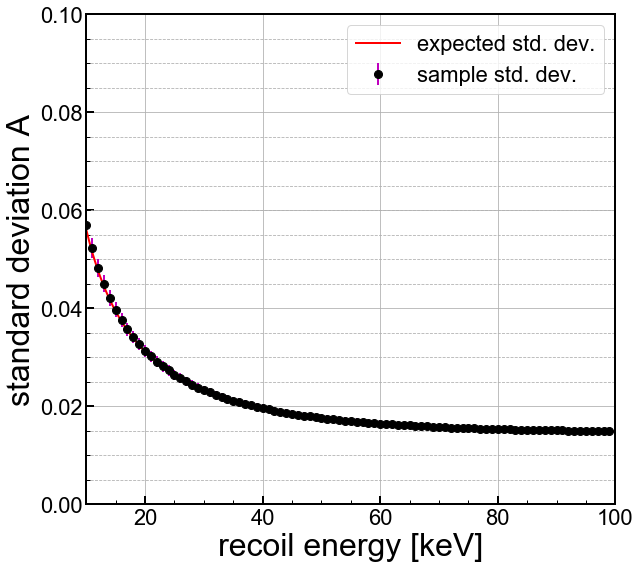

In [3]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

X = np.arange(emin,emax,0.01)
Yv = ylindv(X*1000)
expected_sig = (1/X)*np.sqrt((1+(V/eps)*Yv)**2*fqv(Yv*X)**2 + Yv**2*fptv((1+(V/eps)*Yv)*X)**2)
#expected_sig = (1/X)*np.sqrt((1+(V/eps)*Yv)**2*fqv(Yv*X)**2 + (1+(V/eps))**2*Yv**2*fptv((1+(V/eps)*Yv)*X)**2)

#print(np.std(A,0))
ax1.errorbar(Er,np.std(A,0),yerr=[sampsig_err,sampsig_err], \
            ecolor='m',color='k', linestyle='none', label='sample std. dev.', linewidth=2, \
            marker='o', markersize=8)
ax1.plot(X,expected_sig,'r-',label='expected std. dev.')


ymin=0.0
ymax=0.1


ax1.set_yscale('linear')
ax1.set_xlim(emin, emax)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel('recoil energy [keV]',**axis_font)
ax1.set_ylabel('standard deviation A',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figures')
plt.show()

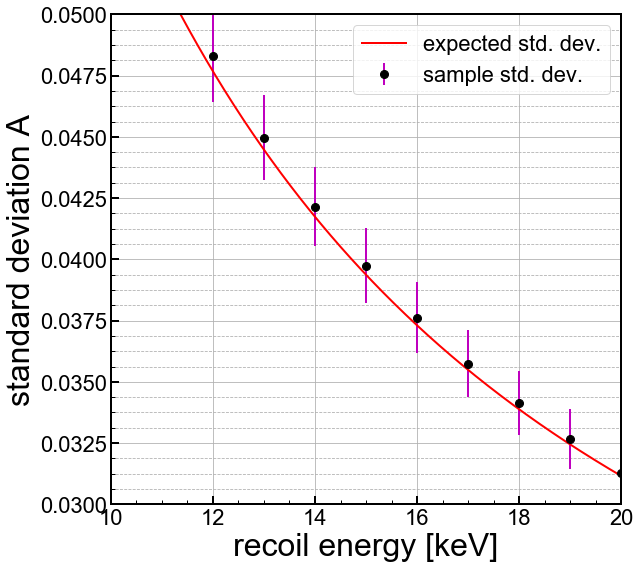

In [4]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes
emin = 10
emax = 20

X = np.arange(emin,emax,0.01)
Yv = ylindv(X*1000)
expected_sig = (1/X)*np.sqrt((1+(V/eps)*Yv)**2*fqv(Yv*X)**2 + Yv**2*fptv((1+(V/eps)*Yv)*X)**2)
#expected_sig = (1/X)*np.sqrt((1+(V/eps)*Yv)**2*fqv(Yv*X)**2 + (1+(V/eps))**2*Yv**2*fptv((1+(V/eps)*Yv)*X)**2)

#print(np.std(A,0))
ax1.errorbar(Er,np.std(A,0),yerr=[sampsig_err,sampsig_err], \
            ecolor='m',color='k', linestyle='none', label='sample std. dev.', linewidth=2, \
            marker='o', markersize=8)
ax1.plot(X,expected_sig,'r-',label='expected std. dev.')


ymin=0.03
ymax=0.05


ax1.set_yscale('linear')
ax1.set_xlim(emin, emax)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel('recoil energy [keV]',**axis_font)
ax1.set_ylabel('standard deviation A',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figures')
plt.show()

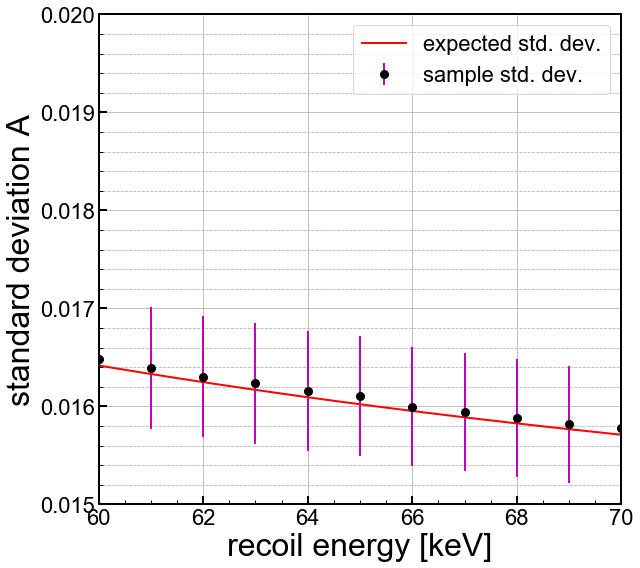

In [5]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes
emin = 60
emax = 70

X = np.arange(emin,emax,0.01)
Yv = ylindv(X*1000)
expected_sig = (1/X)*np.sqrt((1+(V/eps)*Yv)**2*fqv(Yv*X)**2 + Yv**2*fptv((1+(V/eps)*Yv)*X)**2)
#expected_sig = (1/X)*np.sqrt((1+(V/eps)*Yv)**2*fqv(Yv*X)**2 + (1+(V/eps))**2*Yv**2*fptv((1+(V/eps)*Yv)*X)**2)

#print(np.std(A,0))
ax1.errorbar(Er,np.std(A,0),yerr=[sampsig_err,sampsig_err], \
            ecolor='m',color='k', linestyle='none', label='sample std. dev.', linewidth=2, \
            marker='o', markersize=8)
ax1.plot(X,expected_sig,'r-',label='expected std. dev.')


ymin=0.015
ymax=0.02


ax1.set_yscale('linear')
ax1.set_xlim(emin, emax)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel('recoil energy [keV]',**axis_font)
ax1.set_ylabel('standard deviation A',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figures')
plt.show()